# Implementation 7 - Assessment of a classification model

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Importing the data set

In [32]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [33]:
dataset.head(10)

User ID  Gender  Age  EstimatedSalary Purchased
0  15624510    Male   19            19000        no
1  15810944    Male   35            20000        no
2  15668575  Female   26            43000        no
3  15603246  Female   27            57000        no
4  15804002    Male   19            76000        no
5  15728773    Male   27            58000        no
6  15598044  Female   27            84000        no
7  15694829  Female   32           150000       yes
8  15600575    Male   25            33000        no
9  15727311  Female   35            65000        no

In [34]:
X = dataset[['Age', 'EstimatedSalary']].values
print(X[:10])

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]


In [35]:
print(dataset['Purchased'][:10].values)

['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']


## Inspecting the data set

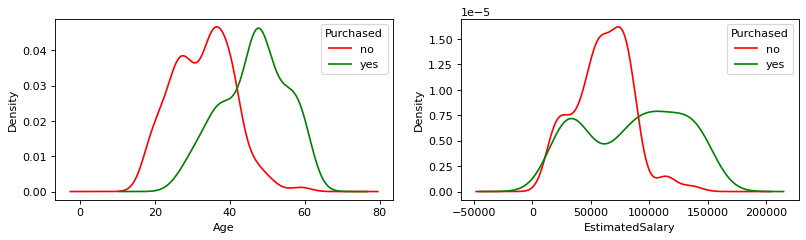

In [36]:
feature_list = ['Age', 'EstimatedSalary']

fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 80)
for i_axs in range(len(feature_list)):
    for i_purchase, purchase in enumerate(['no', 'yes']):
        (dataset[feature_list[i_axs]][dataset['Purchased']==purchase]).plot(kind='density', label=purchase, c=['red', 'green'][i_purchase], ax=axs[i_axs])
    axs[i_axs].set_xlabel(feature_list[i_axs])
    axs[i_axs].legend(title='Purchased')
plt.show()   

Alternative:

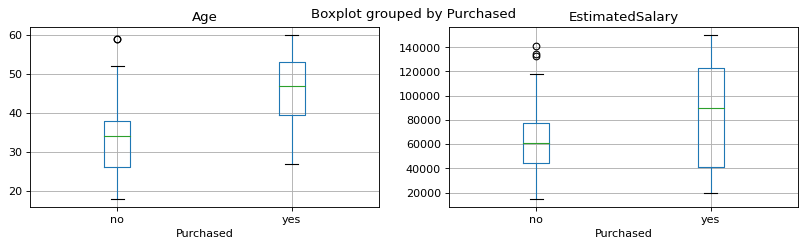

In [37]:
feature_list = ['Age', 'EstimatedSalary']

fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 80)
for i_axs in range(len(feature_list)):
    dataset.boxplot(column=feature_list[i_axs], by='Purchased', ax=axs[i_axs])
plt.show()  

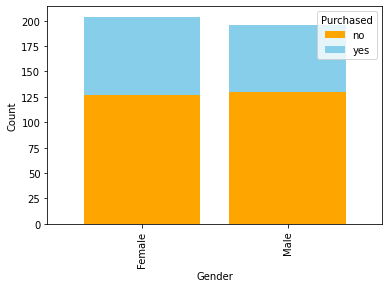

In [38]:
df_plot = dataset.groupby(['Gender', 'Purchased']).size().reset_index().pivot(index='Gender', columns='Purchased', values=0)
df_plot.plot(kind='bar', stacked=True, color=['orange', 'skyblue'], width=0.8)
plt.ylabel('Count')
plt.show() 

## Preparing the data set

**Encoding:**

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['Purchased'])
print(y[:10])

[0 0 0 0 0 0 0 1 0 0]


**Train-test split:**

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (300, 2) (300,)
Test set: (100, 2) (100,)


In [41]:
print(X_train[:10])

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]]


**Feature scaling:**

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
X_train[:10]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153]])

## Training the logistic regression model

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
# classifier = LogisticRegression(C=0.01, solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression()

We can check what prediction is made on some examples:

In [45]:
print(label_encoder.inverse_transform(classifier.predict(sc.transform([[30,200000]]))))

['yes']


In [46]:
print(label_encoder.inverse_transform(classifier.predict(sc.transform([[30,100000]]))))

['no']


## Making predictions

**Probability of purchasing:**

In [47]:
y_proba = classifier.predict_proba(X_test)
y_proba[:10]

array([[0.88725351, 0.11274649],
       [0.83324206, 0.16675794],
       [0.80549253, 0.19450747],
       [0.91056209, 0.08943791],
       [0.90253903, 0.09746097],
       [0.99212979, 0.00787021],
       [0.9848589 , 0.0151411 ],
       [0.26779092, 0.73220908],
       [0.99419108, 0.00580892],
       [0.49579544, 0.50420456]])

**Prediction of the class and comparison with the true one:**

In [48]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]]


## Performance assessment

**Confusion matrix:**

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


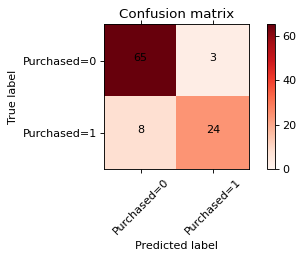

In [50]:
fig = plt.figure(figsize=(5,3), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(cm, cmap = plt.cm.Reds, vmin=0)
fig.colorbar(cax)
classes=['Purchased=0','Purchased=1']
ticks = np.arange(len(classes))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="black")
plt.xticks(ticks, classes, rotation=45)
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(ticks, classes)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Accuracy, precision, recall:**

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, y_pred),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, y_pred),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, y_pred),2)))

Accuracy (proportion of correct predictions) is 0.89
Precision (proportion of true purchases among purchase predictions) is 0.89
Recall (proportion of true purchases that are correctly predicted) is 0.75


In [52]:
# Alternative
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.75      0.81        32
           0       0.89      0.96      0.92        68

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



**ROC curve and AUC:**

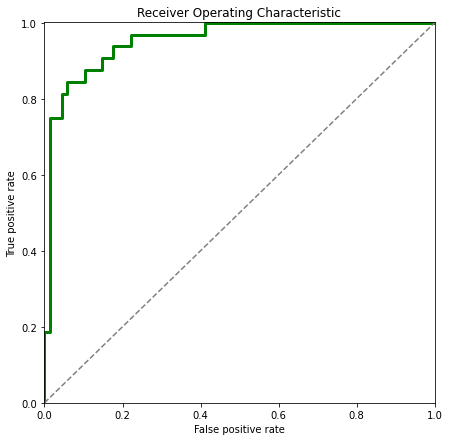

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = y_proba[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

plt.subplots(1, figsize=(7,7))
plt.plot(false_positive_rate, true_positive_rate, c='green', linewidth=3)

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--", c='grey')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

plt.show()

In [54]:
print('AUC: ', roc_auc_score(y_test, y_score))

AUC:  0.9540441176470588


## Plotting class domains

**On training set**

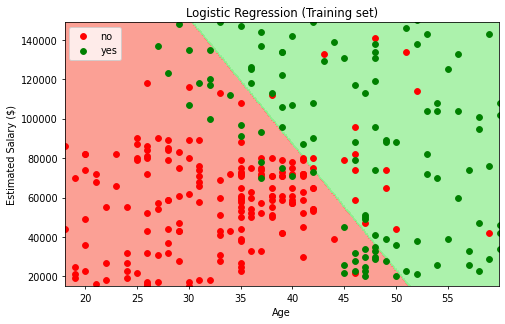

In [55]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8,5), dpi= 70)
X_set, y_set = sc.inverse_transform(X_train), label_encoder.inverse_transform(y_train)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.1),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 1000))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary ($)')
plt.legend()
plt.show()

**On test set**

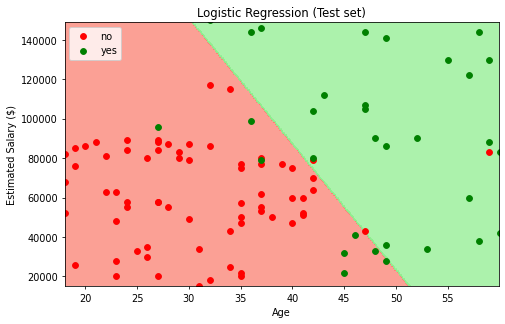

In [56]:
fig = plt.figure(figsize=(8,5), dpi= 70)
X_set, y_set = sc.inverse_transform(X_test), label_encoder.inverse_transform(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.1),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 1000))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary ($)')
plt.legend()
plt.show()

## Comparison with model with one single predictor

In [70]:
X = dataset['EstimatedSalary'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[66  2]
 [17 15]]


In [67]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, y_pred),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, y_pred),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, y_pred),2)))

Accuracy (proportion of correct predictions) is 0.81
Precision (proportion of true purchases among purchase predictions) is 0.88
Recall (proportion of true purchases that are correctly predicted) is 0.47


Reminder of the performance with the two predictors:

In [71]:
print(cm)

[[65  3]
 [ 8 24]]


`Accuracy (proportion of correct predictions) is 0.89
Precision (proportion of true purchases among purchase predictions) is 0.89
Recall (proportion of true purchases that are correctly predicted) is 0.75`

With the estimated salary as unique predictor, we have one more false positive and nine more false negatives. The precision is thus almost the same whereas the recall decreased significantly.